In [1]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def initialize_state(G, initial_infected):
    state = {}
    for node in G.nodes():
        if node in initial_infected:
            state[node] = 'I'
        else:
            state[node] = 'S'
    return state

In [3]:
def si_model(G, initial_infected, beta, num_steps):
    state = initialize_state(G, initial_infected)
    infected_count = [len(initial_infected)]
    for _ in range(num_steps):
        newly_infected = []
        for node in G.nodes():
            if state[node] == 'S':
                neighbors = G.neighbors(node)
                for neighbor in neighbors:
                    if state[neighbor] == 'I' and random.random() < beta:
                        newly_infected.append(node)
                        break
        for node in newly_infected:
            state[node] = 'I'
        infected_count.append(len(initial_infected) + len(newly_infected))
    return infected_count

In [4]:
def sis_model(G, initial_infected, beta, gamma, num_steps):
    state = initialize_state(G, initial_infected)
    infected_count = [len(initial_infected)]
    for _ in range(num_steps):
        newly_infected = []
        newly_recovered = []
        for node in G.nodes():
            if state[node] == 'S':
                neighbors = G.neighbors(node)
                for neighbor in neighbors:
                    if state[neighbor] == 'I' and random.random() < beta:
                        newly_infected.append(node)
                        break
            elif state[node] == 'I' and random.random() < gamma:
                newly_recovered.append(node)
        for node in newly_infected:
            state[node] = 'I'
        for node in newly_recovered:
            state[node] = 'S'
        infected_count.append(len(initial_infected) + len(newly_infected))
    return infected_count

In [5]:
def sir_model(G, initial_infected, beta, gamma, num_steps):
    state = initialize_state(G, initial_infected)
    infected_count = [len(initial_infected)]
    for _ in range(num_steps):
        newly_infected = []
        newly_recovered = []
        for node in G.nodes():
            if state[node] == 'S':
                neighbors = G.neighbors(node)
                for neighbor in neighbors:
                    if state[neighbor] == 'I' and random.random() < beta:
                        newly_infected.append(node)
                        break
            elif state[node] == 'I' and random.random() < gamma:
                newly_recovered.append(node)
        for node in newly_infected:
            state[node] = 'I'
        for node in newly_recovered:
            state[node] = 'R'
        infected_count.append(len(initial_infected) + len(newly_infected))
    return infected_count

In [6]:
def sirs_model(G, initial_infected, beta, gamma, mu, num_steps):
    state = initialize_state(G, initial_infected)
    infected_count = [len(initial_infected)]
    for _ in range(num_steps):
        newly_infected = []
        newly_recovered = []
        newly_susceptible = []
        for node in G.nodes():
            if state[node] == 'S':
                neighbors = G.neighbors(node)
                for neighbor in neighbors:
                    if state[neighbor] == 'I' and random.random() < beta:
                        newly_infected.append(node)
                        break
            elif state[node] == 'I' and random.random() < gamma:
                newly_recovered.append(node)
            elif state[node] == 'R' and random.random() < mu:
                newly_susceptible.append(node)
        for node in newly_infected:
            state[node] = 'I'
        for node in newly_recovered:
            state[node] = 'R'
        for node in newly_susceptible:
            state[node] = 'S'
        infected_count.append(len(initial_infected) + len(newly_infected))
    return infected_count

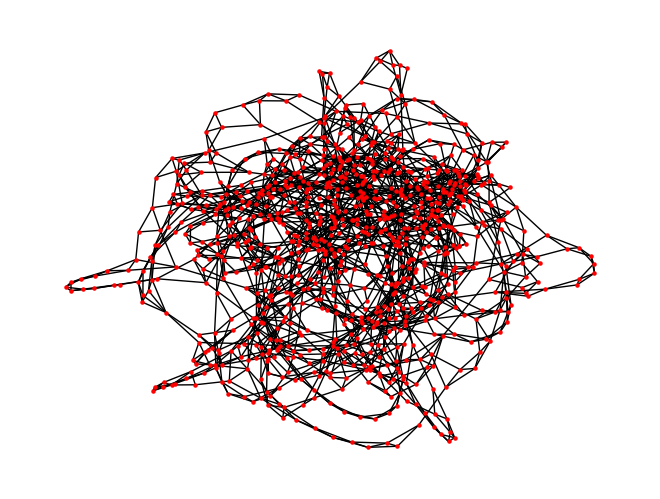

In [7]:
# Generate Watts-Strogatz graph
N = 1000  # Number of nodes
K = 4     # Average degree
p = 0.1   # Rewiring probability
G = nx.watts_strogatz_graph(N, K, p)
nx.draw(G, node_size=5, node_color = 'red', edge_color = 'black')

In [8]:
# Initial infected nodes
initial_infected = [random.choice(list(G.nodes()))]

# Parameters
beta = 0.3  # Infection rate
gamma = 0.1 # Recovery rate
mu = 0.05  # Immunity loss rate
num_steps = 100

# Simulate epidemic models
si_infected = si_model(G, initial_infected, beta, num_steps)
sis_infected = sis_model(G, initial_infected, beta, gamma, num_steps)
sir_infected = sir_model(G, initial_infected, beta, gamma, num_steps)
sirs_infected = sirs_model(G, initial_infected, beta, gamma, mu, num_steps)

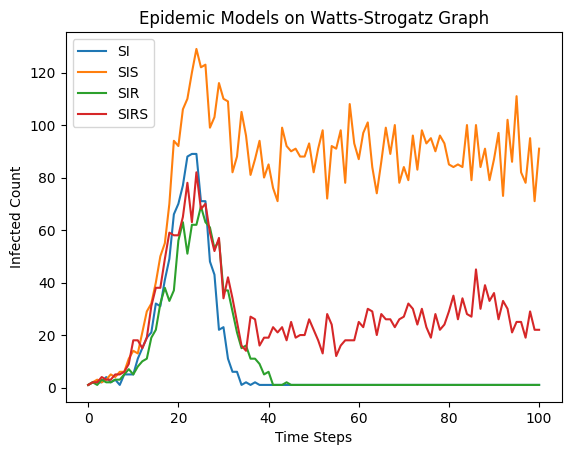

In [9]:
# Plotting (using GNUPLOT)

steps = list(range(num_steps + 1))
plt.plot(steps, si_infected, label='SI')
plt.plot(steps, sis_infected, label='SIS')
plt.plot(steps, sir_infected, label='SIR')
plt.plot(steps, sirs_infected, label='SIRS')
plt.xlabel('Time Steps')
plt.ylabel('Infected Count')
plt.title('Epidemic Models on Watts-Strogatz Graph')
plt.legend()
plt.show()

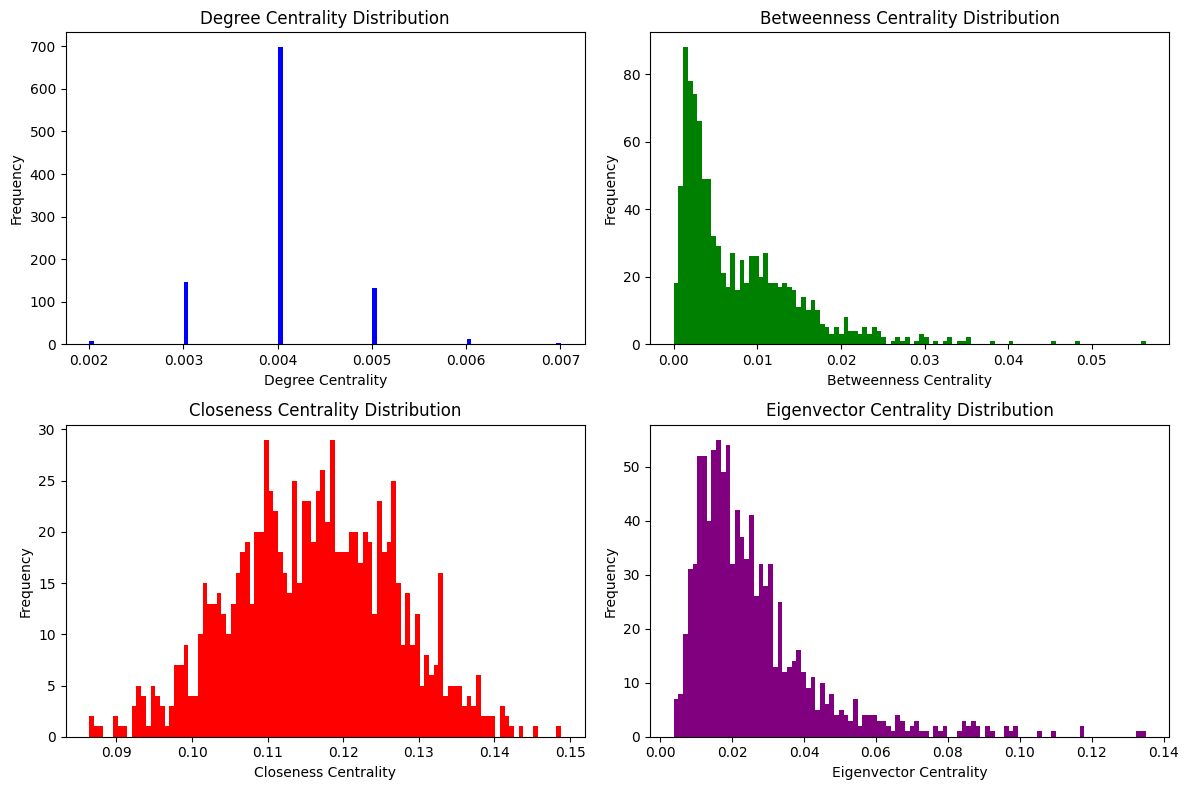

In [13]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)


# Plot centrality distributions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(list(degree_centrality.values()), bins=100, color='blue')
plt.title('Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(list(betweenness_centrality.values()), bins=100, color='green')
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(list(closeness_centrality.values()), bins=100, color='red')
plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(list(eigenvector_centrality.values()), bins=100, color='purple')
plt.title('Eigenvector Centrality Distribution')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
